# *Salinass* Convertir dataset .mat a .txt y .csv

In [1]:
import numpy as np
import os
import scipy.io
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



## Metodo de Union de pixeles en funcion a las bandas

In [2]:
def extraerPixelesPorBanda(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

## Definiendo Rutas

In [3]:
mats="../../Datasets/mat/"
archivoMat="Salinas.mat"
archivoMatGT="Salinas_gt.mat"

llave="salinas"
llaveGT="salinas_gt"

rutaCSVs="../../Datasets/csv"
rutaTXTs="../../Datasets/txt"
archivoCSV="Salinas.csv"
archivoTXT="Salinas.txt"

In [4]:
mat = scipy.io.loadmat(mats+archivoMat)
mat_gt=scipy.io.loadmat(mats+archivoMatGT)
indianPines=mat[llave]
indianPines_gt=mat_gt[llaveGT]

df = extraerPixelesPorBanda(indianPines, indianPines_gt)


100%|██████████| 224/224 [00:06<00:00, 33.54it/s]


# Normalizacion

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

################################################################### Normalizacion
#X_scaled = scaler.fit_transform(X)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# Supongamos que X es tu conjunto de datos
#X_scaled = scaler.fit_transform(X)
X=np.array(X)
max_value_X = np.max(X)
X_scaled = (X / max_value_X)
###################################################################
# Convertir X_scaled de vuelta a un DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])

# Convertir y de vuelta a un DataFrame
y_df = pd.DataFrame(y, columns=[df.columns[-1]])

# Si se desea combinar X_scaled_df y y_df en un solo DataFrame
df= pd.concat([X_scaled_df, y_df], axis=1)



In [6]:
#df.to_csv('IndianPines_NOcORRECTED.csv', index=False)
df.to_csv(rutaCSVs+"/"+archivoCSV, index=False)

# Separando Datasets

In [7]:
df.loc[:, 'class'].value_counts()

class
0     56975
8     11271
15     7268
9      6203
6      3959
2      3726
7      3579
10     3278
5      2678
1      2009
3      1976
12     1927
16     1807
4      1394
14     1070
11     1068
13      916
Name: count, dtype: int64

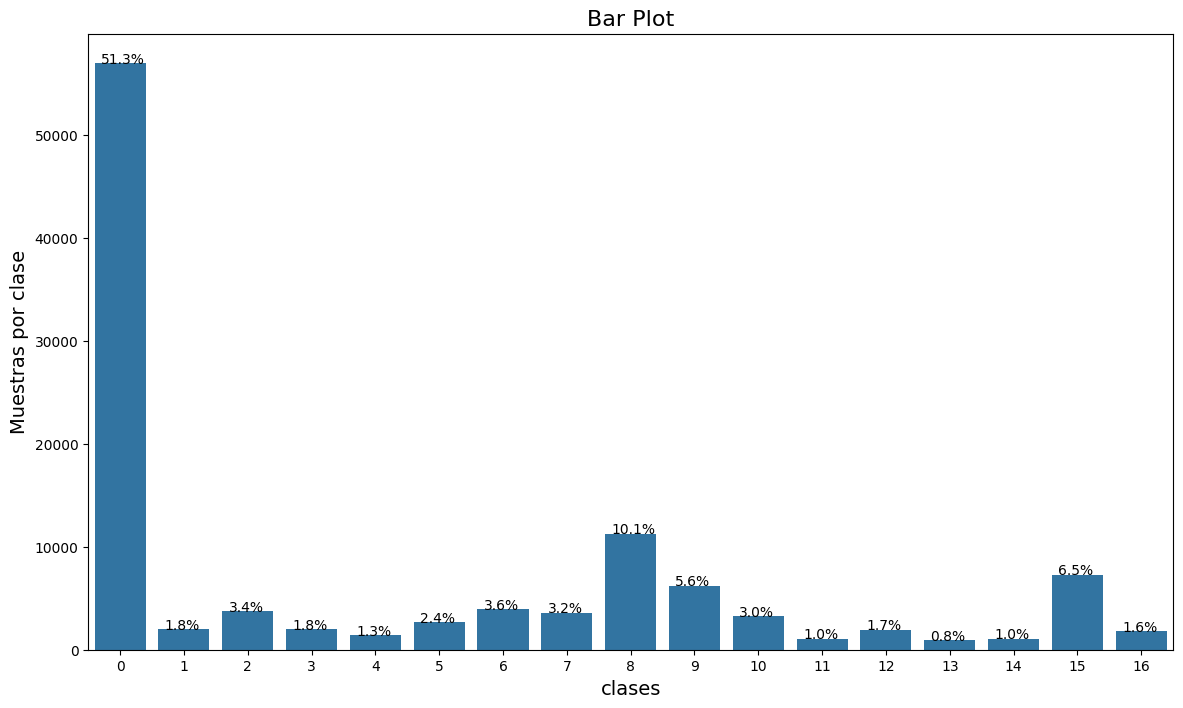

In [8]:
plt.figure(figsize=(14, 8))

plt.autoscale=True
plt.Text='Grafica'
ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Muestras por clase', fontsize=14)

plt.xlabel('clases', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

# *X* y *y*

In [9]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

# Dividiendo  dataset

In [10]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# DataFrame original
df = pd.read_csv(rutaCSVs+"/"+archivoCSV)  # Suponiendo que tienes un archivo CSV con tus datos

# Dividir el DataFrame en conjuntos de entrenamiento (70%) y prueba (30%)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Imprimir las formas de los nuevos DataFrames
print("Tamaño del conjunto de entrenamiento:", train_df.shape)
print("Tamaño del conjunto de prueba:", test_df.shape)

Tamaño del conjunto de entrenamiento: (77772, 225)
Tamaño del conjunto de prueba: (33332, 225)


In [11]:
train_df

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-216,band-217,band-218,band-219,band-220,band-221,band-222,band-223,band-224,class
75962,0.032910,0.035082,0.064733,0.113066,0.137395,0.144347,0.135006,0.146410,0.164549,0.167155,...,0.008363,0.007603,0.004888,0.006191,0.004670,0.002824,0.001195,0.001629,0.000869,0
78827,0.047572,0.071359,0.093081,0.164983,0.207994,0.220919,0.218312,0.248072,0.290757,0.305203,...,0.027262,0.022700,0.014337,0.020745,0.014337,0.007820,0.002607,0.004236,0.002607,0
87792,0.040295,0.050614,0.079070,0.136201,0.172803,0.183665,0.180949,0.203324,0.235582,0.244705,...,0.023460,0.019768,0.012056,0.017921,0.012165,0.006951,0.002824,0.004019,0.001955,0
5372,0.039970,0.042250,0.065276,0.100033,0.117628,0.122190,0.109699,0.116216,0.129793,0.127946,...,0.001738,0.002064,0.000869,0.001521,0.000326,-0.000217,0.000109,0.000217,0.000109,7
45385,0.033453,0.051917,0.063864,0.099164,0.127186,0.127077,0.121972,0.132291,0.148583,0.148908,...,0.006517,0.005756,0.003150,0.005322,0.003693,0.001086,0.000109,0.000434,0.000543,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,0.039644,0.042468,0.071902,0.108722,0.136309,0.141957,0.136635,0.149669,0.169219,0.174107,...,0.009015,0.006843,0.005322,0.006843,0.004670,0.003367,0.001195,0.001846,0.000652,0
110268,0.025741,0.041599,0.058651,0.091018,0.120886,0.127294,0.122081,0.131965,0.148800,0.150212,...,0.006300,0.005322,0.003801,0.004779,0.002933,0.001738,0.000760,0.001195,0.000652,0
103694,0.033127,0.052786,0.079505,0.118497,0.156403,0.164331,0.156403,0.173346,0.197784,0.205279,...,0.019007,0.015857,0.009123,0.014337,0.009775,0.005648,0.001412,0.002281,0.001955,0
860,0.040947,0.050831,0.063864,0.108939,0.136418,0.139025,0.134354,0.146410,0.166069,0.168567,...,0.003476,0.002933,0.001955,0.002172,0.001195,0.000543,0.000326,0.000543,-0.000109,0


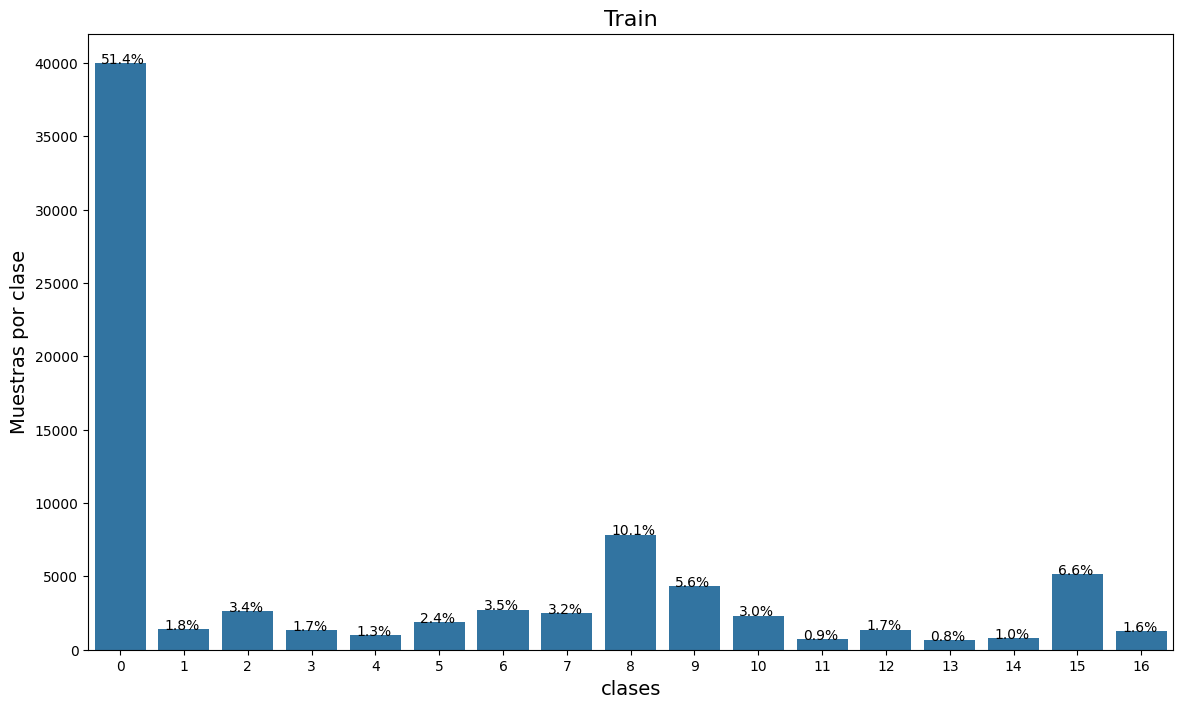

In [12]:
plt.figure(figsize=(14, 8))

plt.autoscale=True
plt.Text='Grafica'
ax = sns.countplot(x='class', data=train_df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/train_df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Muestras por clase', fontsize=14)

plt.xlabel('clases', fontsize=14)

plt.title('Train', fontsize=16)

plt.show()

In [13]:
test_df

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-216,band-217,band-218,band-219,band-220,band-221,band-222,band-223,band-224,class
36435,0.047355,0.050614,0.086239,0.135983,0.172369,0.176062,0.174432,0.190942,0.219724,0.230585,...,0.019659,0.016944,0.009558,0.014120,0.009558,0.004888,0.001955,0.003041,0.001086,0
96854,0.048333,0.062452,0.094602,0.146302,0.182144,0.196481,0.189312,0.212338,0.245140,0.256109,...,0.024329,0.021505,0.012599,0.018790,0.012599,0.007168,0.002933,0.004019,0.001955,9
6980,0.032149,0.043662,0.065385,0.104812,0.130444,0.132182,0.124362,0.135875,0.148691,0.151950,...,0.007277,0.005105,0.003367,0.004562,0.003367,0.001521,0.000326,0.001412,0.000000,15
12909,0.040513,0.062561,0.078962,0.132399,0.169219,0.171609,0.168242,0.187901,0.215054,0.222222,...,0.014663,0.013034,0.007494,0.010970,0.006951,0.004019,0.001412,0.001521,0.001086,5
8852,0.040621,0.034648,0.065276,0.099381,0.120995,0.121755,0.113609,0.121321,0.131313,0.129141,...,0.002172,0.001846,0.000869,0.001629,0.001195,0.000109,0.000217,0.000326,0.000652,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103826,0.040513,0.052243,0.079505,0.104377,0.130879,0.129901,0.120235,0.127077,0.140871,0.141740,...,0.003584,0.003693,0.001629,0.003041,0.001629,0.000869,0.000326,0.000000,0.000434,0
4456,0.047138,0.060497,0.093624,0.150755,0.200825,0.215814,0.211795,0.238949,0.279461,0.293907,...,0.013794,0.011079,0.006300,0.010101,0.005974,0.003258,0.001195,0.002064,0.000869,0
54035,0.041164,0.051700,0.078744,0.128163,0.152819,0.161616,0.153687,0.169436,0.191159,0.198436,...,0.012490,0.010318,0.006191,0.009884,0.007060,0.003476,0.001412,0.002933,0.001086,8
93773,0.056587,0.061692,0.093516,0.137287,0.185185,0.193874,0.188769,0.217552,0.249810,0.260128,...,0.025633,0.022374,0.014120,0.019876,0.013685,0.007603,0.002824,0.004453,0.002281,9


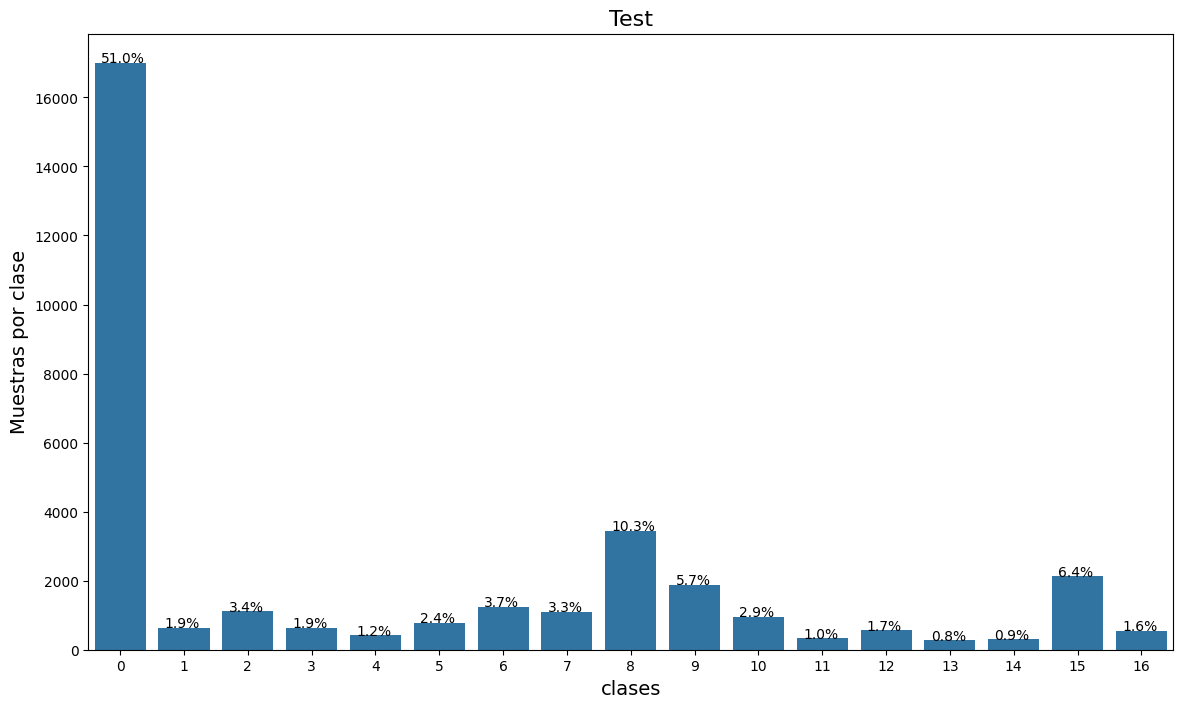

In [14]:
plt.figure(figsize=(14, 8))

plt.autoscale=True
plt.Text='Grafica'
ax = sns.countplot(x='class', data=test_df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/test_df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Muestras por clase', fontsize=14)

plt.xlabel('clases', fontsize=14)

plt.title('Test', fontsize=16)

plt.show()

# Guardando archivos

## CSV

In [15]:
train_df.to_csv(rutaCSVs+"/train/"+archivoCSV, index=False)
test_df.to_csv(rutaCSVs+"/test/"+archivoCSV, index=False)


## TXT

In [ ]:
train_df.to_csv(rutaTXTs+"/train/"+archivoTXT, sep=' ', index=False,header=False)
train_df.to_csv("../../Datasets/txt/sampled_train/"+archivoTXT, sep=' ', index=False,header=False)
test_df.to_csv(rutaTXTs+"/test/"+archivoTXT, sep=' ', index=False, header=False)
